<a href="https://colab.research.google.com/github/ephemerno/Projects-Data/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN, OPTICS, KMeans
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

In [3]:
data = pd.read_csv("/content/DATA_1112_eng.csv", sep=";", encoding='latin-1')
MRT_EEG = data[(data['EEG'] == 1) & (data['MRI'] == 1)]
MRT_EEG = MRT_EEG.drop(columns=data.columns[:115])
MRT_EEG = MRT_EEG.drop(columns=['MRI', "EEG"])
EEG = MRT_EEG[data.columns[-64:]]
MRT = MRT_EEG[MRT_EEG.columns[:-64]]

In [4]:
data.head()

,id,Code3,Sex,Age,Education,Occupation,Martial Status,Accommodation,Living Condition,Disability,Heredity,Infectious diseases of the NS,Substance abuse,Intoxication,Traumatic brain injury,Hypertension,Cerebral vascular disorders,Endocrine diseases,Allergic diseases,Cytogenetics,Normalized cytogen,Immunology,Albumin,Cholesterol,Total protein,Glucose,High-density lipoproteins,Low-density lipoproteins,Triglycerides,C-reactive protein,K.a,Prolactin,Cortisol,Dehydroepiandrosterone Sulfate,Court/DHEA,Estradiol,Testosterone,Insulin,TTG,T3,...,O1-Av Teta,O2-Av Teta,F7-Av Teta,F8-Av Teta,T3-Av Teta,T4-Av Teta,T5-Av Teta,T6-Av Teta,Fp1-Av Alfa,Fp2-Av Alfa,F3-Av Alfa,F4-Av Alfa,C3-Av Alfa,C4-Av Alfa,P3-Av Alfa,P4-Av Alfa,O1-Av Alfa,O2-Av Alfa,F7-Av Alfa,F8-Av Alfa,T3-Av Alfa,T4-Av Alfa,T5-Av Alfa,T6-Av Alfa,Fp1-Av Beta1,Fp2-Av Beta1,F3-Av Beta1,F4-Av Beta1,C3-Av Beta1,C4-Av Beta1,P3-Av Beta1,P4-Av Beta1,O1-Av Beta1,O2-Av Beta1,F7-Av Beta1,F8-Av Beta1,T3-Av Beta1,T4-Av Beta1,T5-Av Beta1,T6-Av Beta1
0,1,1,2,83,6.0,6.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,51.0,0.51,NaN,40.0,44687.0,72.30,12905.0,29952.00,33270.0,0.92,13.85,12086.0,183.0,1641.0,0.88,NaN,108.0,0.34,44719.0,43101.0,23043.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,69,4.0,6.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,55.0,0.55,NaN,45.2,44809.0,73.00,12905.0,42005.00,16528.0,13150.00,35309.00,NaN,NaN,564.0,44715.00,NaN,245.0,13.79,44674.0,44652.0,44685.0,...,0.248,0.250,0.344,0.316,0.350,0.323,0.332,0.346,0.265,0.311,0.272,0.340,0.303,0.294,0.351,0.313,0.337,0.282,0.337,0.299,0.372,0.347,0.353,0.300,0.201,0.264,0.251,0.298,0.259,0.270,0.286,0.273,0.278,0.237,0.297,0.261,0.320,0.314,0.294,0.276
2,3,3,2,64,6.0,6.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,45.0,0.45,NaN,44.0,35217.0,71.98,44807.0,44806.00,24898.0,44927.00,0.20,NaN,36.0,516.0,44774.00,NaN,NaN,0.87,12.0,44596.0,44653.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,2,56,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,80.0,0.80,NaN,42.8,32264.0,68.94,30407.0,27030.00,34731.0,0.78,0.06,44594.0,95.0,393.0,15401.00,NaN,157.0,0.80,NaN,16438.0,42856.0,...,0.272,0.300,0.280,0.266,0.235,0.253,0.252,0.249,0.256,0.275,0.262,0.326,0.257,0.293,0.289,0.307,0.296,0.312,0.269,0.255,0.295,0.246,0.286,0.273,0.277,0.326,0.319,0.337,0.288,0.301,0.305,0.290,0.307,0.314,0.257,0.297,0.300,0.306,0.316,0.327
4,5,2,1,74,4.0,6.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,67.0,0.67,NaN,41.1,15432.0,68.26,28246.0,0.81,16834.0,25204.00,44593.00,NaN,165.0,503.0,44714.00,NaN,143.0,44661.00,44723.0,44774.0,44776.0,...,0.235,0.293,0.290,0.266,0.279,0.263,0.266,0.315,0.350,0.373,0.350,0.354,0.329,0.318,0.347,0.360,0.299,0.380,0.367,0.341,0.383,0.304,0.365,0.395,0.251,0.324,0.276,0.334,0.300,0.299,0.336,0.323,0.283,0.297,0.276,0.306,0.328,0.306,0.335,0.319


In [5]:
MRT_dr = MRT.dropna()
EEG_dr = EEG.dropna()
EEG_dr.columns

Index(['Fp1-Av Delta', 'Fp2-Av Delta', 'F3-Av Delta', 'F4-Av Delta',
       'C3-Av Delta', 'C4-Av Delta', 'P3-Av Delta', 'P4-Av Delta',
       'O1-Av Delta', 'O2-Av Delta', 'F7-Av Delta', 'F8-Av Delta',
       'T3-Av Delta', 'T4-Av Delta', 'T5-Av Delta', 'T6-Av Delta',
       'Fp1-Av Teta', 'Fp2-Av Teta', 'F3-Av Teta', 'F4-Av Teta', 'C3-Av Teta',
       'C4-Av Teta', 'P3-Av Teta', 'P4-Av Teta', 'O1-Av Teta', 'O2-Av Teta',
       'F7-Av Teta', 'F8-Av Teta', 'T3-Av Teta', 'T4-Av Teta', 'T5-Av Teta',
       'T6-Av Teta', 'Fp1-Av Alfa', 'Fp2-Av Alfa', 'F3-Av Alfa', 'F4-Av Alfa',
       'C3-Av Alfa', 'C4-Av Alfa', 'P3-Av Alfa', 'P4-Av Alfa', 'O1-Av Alfa',
       'O2-Av Alfa', 'F7-Av Alfa', 'F8-Av Alfa', 'T3-Av Alfa', 'T4-Av Alfa',
       'T5-Av Alfa', 'T6-Av Alfa', 'Fp1-Av Beta1', 'Fp2-Av Beta1',
       'F3-Av Beta1', 'F4-Av Beta1', 'C3-Av Beta1', 'C4-Av Beta1',
       'P3-Av Beta1', 'P4-Av Beta1', 'O1-Av Beta1', 'O2-Av Beta1',
       'F7-Av Beta1', 'F8-Av Beta1', 'T3-Av Beta1', 'T4-Av Beta

In [6]:
def my_metric(x, y):
  c = 1 / np.correlate(x, y)
  return c

In [7]:
1 / my_metric(EEG_dr.iloc[0].values, EEG_dr.iloc[1].values)[0]

5.752863

In [8]:
min = 1000
max = -1
for i in range(len(EEG_dr)):
  for j in range(len(EEG_dr)):
    now = 1 / my_metric(EEG_dr.iloc[i].values, EEG_dr.iloc[j].values)[0]
    if now > max:
      max = now
    if now < min:
      min = now
print(min, max)

3.155147 29.767


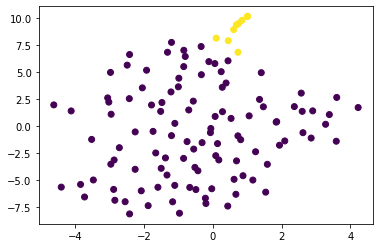

(117, 64)
[-0.19911394 -7.175458  ]
Fp1-Av Delta    0.217
Fp2-Av Delta    0.278
F3-Av Delta     0.231
F4-Av Delta     0.282
C3-Av Delta     0.262
                ...  
F8-Av Beta1     0.293
T3-Av Beta1     0.281
T4-Av Beta1     0.299
T5-Av Beta1     0.346
T6-Av Beta1     0.274
Name: 21, Length: 64, dtype: float64
[ 1.5369161 -6.1236877]
Fp1-Av Delta    0.378
Fp2-Av Delta    0.404
F3-Av Delta     0.284
F4-Av Delta     0.401
C3-Av Delta     0.202
                ...  
F8-Av Beta1     0.353
T3-Av Beta1     0.307
T4-Av Beta1     0.334
T5-Av Beta1     0.293
T6-Av Beta1     0.345
Name: 29, Length: 64, dtype: float64
[-2.4246676  2.5525987]
Fp1-Av Delta    0.277
Fp2-Av Delta    0.323
F3-Av Delta     0.324
F4-Av Delta     0.322
C3-Av Delta     0.348
                ...  
F8-Av Beta1     0.329
T3-Av Beta1     0.380
T4-Av Beta1     0.363
T5-Av Beta1     0.345
T6-Av Beta1     0.298
Name: 30, Length: 64, dtype: float64
[-3.4690619 -4.9945993]
Fp1-Av Delta    0.239
Fp2-Av Delta    0.235
F3-Av Delta

In [15]:
#db = DBSCAN(algorithm = 'auto', eps = 0.0005, metric=my_metric).fit(EEG_dr)
#db = OPTICS(min_samples=6, metric=my_metric).fit(EEG_dr)
#db = KMeans(n_clusters=4, random_state=0).fit(MRT_dr)
db = Birch(branching_factor = 5, n_clusters = 2, threshold = 0.3).fit(EEG_dr)


#pca = PCA(n_components=2)
#components = pca.fit_transform(EEG_dr)

components = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(EEG_dr)
total_var = 5

#total_var = pca.explained_variance_ratio_.sum() * 100
labels = np.array(db.labels_)

plt.scatter(components[:,0],components[:,1],c=db.labels_) #берем все строки 1 столбца
# fig = px.scatter_3d(
#     components, x=0, y=1, z=2, color=db.labels_,
#     title=f'Total Explained Variance: {total_var:.2f}%, num_clusters={len(np.unique(labels))}',
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
# )
# fig.show()
plt.show()
#print(components.shape[0])

print(EEG_dr.shape)
list_index = [0,0]
for i in range(components.shape[0]):
  print(components[i,:])
  print(EEG_dr.iloc[i])
  #index_new = data.iloc[i]['Code3'] 
  index_new = labels[i]
  #print('Index is', index_new)
  list_index[int(index_new) - 1] += 1
print(list_index)  

print(labels) 
cluster1 = []
cluster2 = []
#cluster3 = []
#cluster4 = []
for i in range(components.shape[0]):
  curr = [i,int(data.iloc[i]['Code3'])]
  if labels[i] == 0:
    cluster1.append(curr)
  elif labels[i] == 1:
    cluster2.append(curr)
  # elif labels[i] == 2:
  #   cluster3.append(curr)
  # elif labels[i] == 3:
  #   cluster4.append(curr)    
# print(cluster1)
# print(cluster2)
# print(cluster3)
# print(cluster4)

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
#cluster3 = np.array(cluster3)
#cluster4 = np.array(cluster4)

#print(cluster1, cluster2, cluster3, cluster4)
print(cluster1, cluster2)
unique, counts = np.unique(cluster1[:,1], return_counts=True)
elements_of_sickness1 = dict(zip(unique, counts))
print(elements_of_sickness1)

unique, counts = np.unique(cluster2[:,1], return_counts=True)
elements_of_sickness2 = dict(zip(unique, counts))
print(elements_of_sickness2)

# unique, counts = np.unique(cluster3[:,1], return_counts=True)
# elements_of_sickness3 = dict(zip(unique, counts))
# print(elements_of_sickness3)

# unique, counts = np.unique(cluster4[:,1], return_counts=True)
# elements_of_sickness4 = dict(zip(unique, counts))
# print(elements_of_sickness4)

# db = Birch(branching_factor = 50, n_clusters = 4, threshold = 0.1).fit(EEG_dr)
# pca = PCA(n_components=3)
# components = pca.fit_transform(EEG_dr)

# total_var = pca.explained_variance_ratio_.sum() * 100
# labels = np.array(db.labels_)
# fig = px.scatter_3d(
#     components, x=0, y=1, z=2, color=db.labels_,
#     title=f'Total Explained Variance: {total_var:.2f}%, num_clusters={len(np.unique(labels))}',
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
# )
# fig.show()